In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data 

In [2]:
# Read data from the 3 data files
data_train = pd.read_csv("./data/datatraining.txt")
data_test = pd.read_csv("./data/datatest.txt")
data_test2 = pd.read_csv("./data/datatest2.txt")

# Convert the date column into pandas datatime
for df in [data_train, data_test, data_test2]:
    df['date'] = pd.to_datetime(df['date'])

# Concatenate dataframes from the three data files
mydata = pd.concat([data_train, data_test, data_test2], axis = 0)
mydata = mydata.sort_values(by=['date']).set_index('date')
display(mydata)

Temperature  Humidity       Light          CO2  \
date                                                                  
2015-02-02 14:19:00      23.7000   26.2720  585.200000   749.200000   
2015-02-02 14:19:59      23.7180   26.2900  578.400000   760.400000   
2015-02-02 14:21:00      23.7300   26.2300  572.666667   769.666667   
2015-02-02 14:22:00      23.7225   26.1250  493.750000   774.750000   
2015-02-02 14:23:00      23.7540   26.2000  488.600000   779.000000   
...                          ...       ...         ...          ...   
2015-02-18 09:15:00      20.8150   27.7175  429.750000  1505.250000   
2015-02-18 09:16:00      20.8650   27.7450  423.500000  1514.500000   
2015-02-18 09:16:59      20.8900   27.7450  423.500000  1521.500000   
2015-02-18 09:17:59      20.8900   28.0225  418.750000  1632.000000   
2015-02-18 09:19:00      21.0000   28.1000  409.000000  1864.000000   

                     HumidityRatio  Occupancy  
date                                           
2015-02-02 14:19:00       0.004764          1  
2015-02-02 14:19:59       0.004773          1  
2015-02-02 14:21:00       0.004765          1  
2015-02-02 14:22:00       0.004744          1  
2015-02-02 14:23:00       0.004767          1  
...                            ...        ...  
2015-02-18 09:15:00       0.004213          1  
2015-02-18 09:16:00       0.004230          1  
2015-02-18 09:16:59       0.004237          1  
2015-02-18 09:17:59       0.004279          1  
2015-02-18 09:19:00       0.004321          1  

[20560 rows x 6 columns]

In [3]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB
None


In [4]:
mydata.describe()

Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy  
count  20560.000000  
mean       0.231031  
std        0.421503  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Plot the combined data 

/var/folders/kq/138ykpgn1_1bg7ryj7sh0_ym0000gn/T/ipykernel_33373/2866443938.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


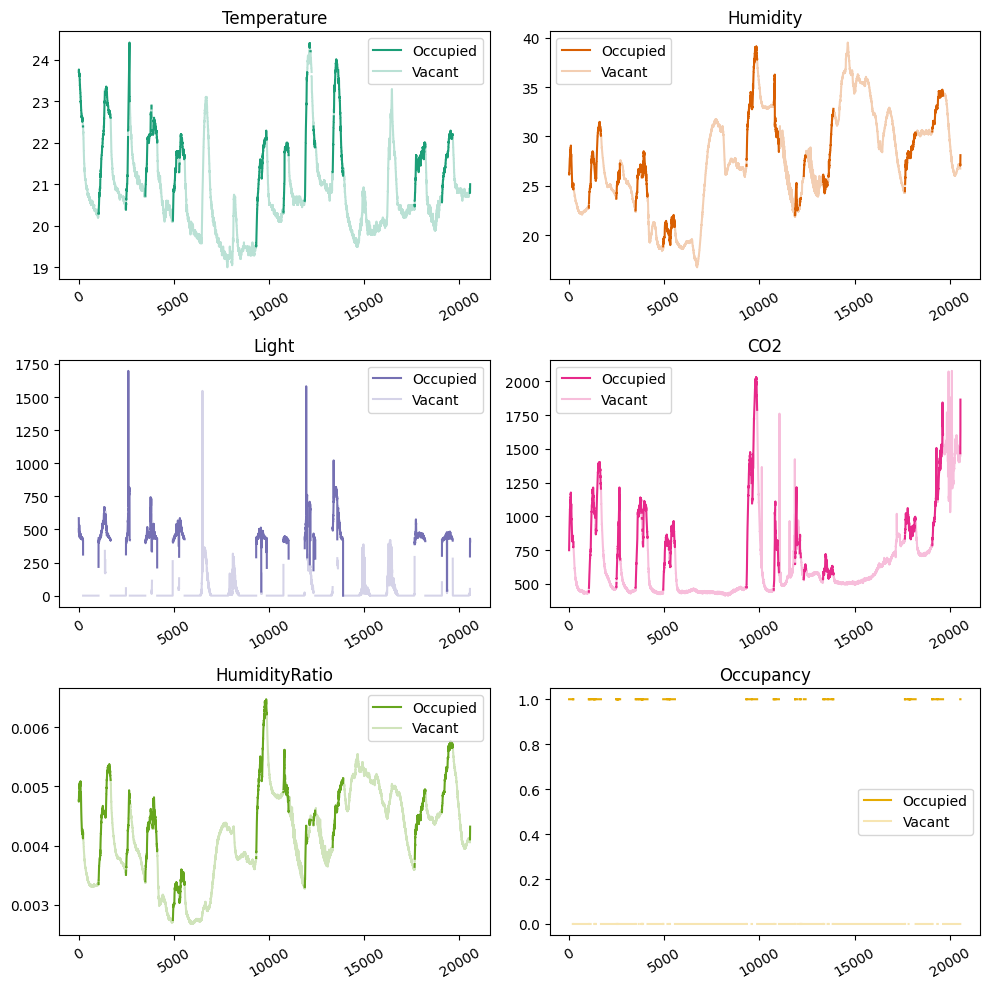

In [7]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

for i , ax in enumerate(axes.flatten()):
    ax.plot(np.where(mydata.Occupancy==1, mydata[mydata.columns[i]], None), label='Occupied', color = colors[i])
    ax.plot(np.where(mydata.Occupancy==0, mydata[mydata.columns[i]], None), label='Vacant', color = colors[i], alpha = 0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_title(mydata.columns[i])
    ax.legend()

fig.tight_layout()
fig.savefig('./figures/data_exploration.png')
plt.show()

## Correlation Plot

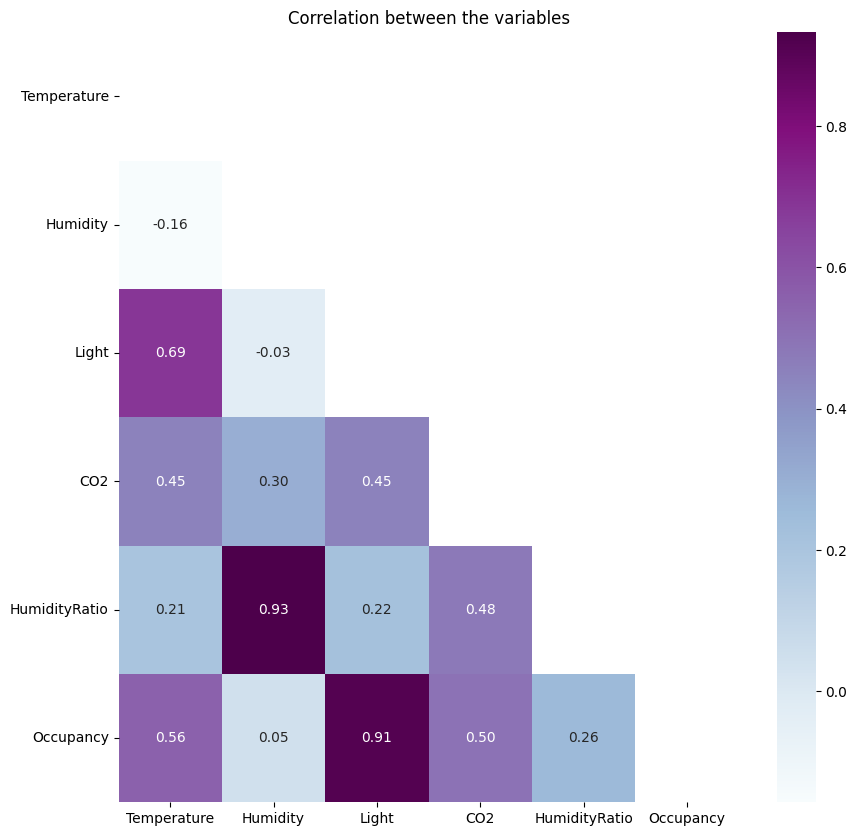

In [8]:
mask = np.triu(np.ones_like(mydata.corr()))
plt.figure(figsize = (10,10))
sns.heatmap(mydata.corr(),annot=True, fmt="1.2f", mask=mask, cmap="BuPu")
plt.yticks(rotation=0)
plt.title('Correlation between the variables')
plt.show()

In [77]:
df = mydata[['Temperature', 'Light' , 'CO2', 'Occupancy']]
display(df)

Temperature       Light          CO2  Occupancy
date                                                                
2015-02-02 14:19:00      23.7000  585.200000   749.200000          1
2015-02-02 14:19:59      23.7180  578.400000   760.400000          1
2015-02-02 14:21:00      23.7300  572.666667   769.666667          1
2015-02-02 14:22:00      23.7225  493.750000   774.750000          1
2015-02-02 14:23:00      23.7540  488.600000   779.000000          1
...                          ...         ...          ...        ...
2015-02-18 09:15:00      20.8150  429.750000  1505.250000          1
2015-02-18 09:16:00      20.8650  423.500000  1514.500000          1
2015-02-18 09:16:59      20.8900  423.500000  1521.500000          1
2015-02-18 09:17:59      20.8900  418.750000  1632.000000          1
2015-02-18 09:19:00      21.0000  409.000000  1864.000000          1

[20560 rows x 4 columns]

## Random Forest Classifier

In [50]:
X, Y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred, rf_score, predit_proba = rf.predict(X_test), rf.score(X_test, Y_test), rf.predict_proba(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.6f}%'.format(rf_score*100))

Accuracy of Random Forest Classifier on test set: 99.241245%


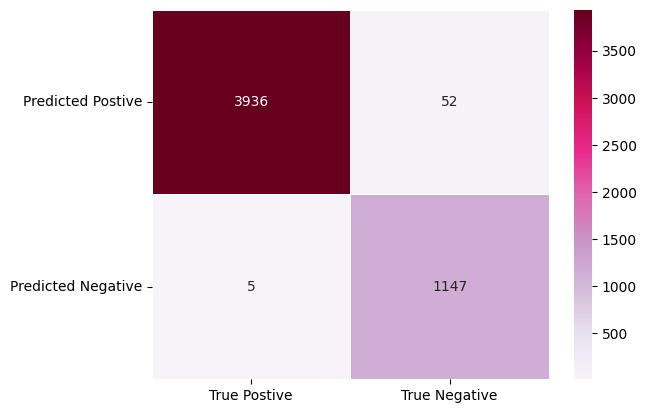

In [76]:
fig, ax = plt.subplots()
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ['True Postive', 'True Negative']
y_axis_labels = ['Predicted Postive', 'Predicted Negative']
sns.heatmap(cm, fmt=".0f", annot=True, linewidths=.5, cmap='PuRd', xticklabels=x_axis_labels)
ax.set_yticklabels(y_axis_labels, rotation=0, ha='right')
plt.show()